# EX00

##### You have to do the calculations by yourself. But you can use any library to display the graph. Print and display matrix confusion. You will have to re-use this exercice later on, so make sure you understand it. This will be checked during the evaluation.

## Confusion Matrix in Data Science

A **confusion matrix** is a fundamental evaluation tool in machine learning and classification tasks. It provides a detailed breakdown of correct and incorrect predictions made by a classification model.

### Structure

The confusion matrix is typically a square table where:
- **Rows** represent the actual/true class labels
- **Columns** represent the predicted class labels
- Each cell contains the count of instances for that actual-predicted combination

### For Binary Classification

|                | Predicted Negative | Predicted Positive |
|----------------|-------------------|-------------------|
| **Actual Negative** | True Negative (TN) | False Positive (FP) |
| **Actual Positive** | False Negative (FN) | True Positive (TP) |

### Key Components

- **True Positive (TP)**: Correctly predicted positive cases
- **True Negative (TN)**: Correctly predicted negative cases
- **False Positive (FP)**: Incorrectly predicted as positive (Type I error)
- **False Negative (FN)**: Incorrectly predicted as negative (Type II error)

### What It Tells Us

1. **Model Accuracy**: Overall correctness of predictions
2. **Precision**: How many predicted positives were actually positive
3. **Recall (Sensitivity)**: How many actual positives were correctly identified
4. **Specificity**: How many actual negatives were correctly identified
5. **Class-specific Performance**: Which classes the model struggles with

### Benefits

- **Visual Interpretation**: Easy to see where the model makes mistakes
- **Error Analysis**: Identify patterns in misclassification
- **Performance Metrics**: Foundation for calculating various evaluation metrics
- **Model Comparison**: Compare different models' performance patterns

The confusion matrix is essential for understanding not just how well your model performs, but *how* and *where* it fails, enabling targeted improvements.

In [5]:
PRED_FILE = "../predictions.txt"
TRU_FILE = "../truth.txt"

In [6]:
%pip install polars

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
import polars as pl

I have two files -- one is with truth.txt and other is predictions.txt. How do I compute the confusion matrix? 

In [8]:
preds_df = pl.read_csv(PRED_FILE, separator='\n', has_header=False, new_columns=['predictions'])
truth_df = pl.read_csv(TRU_FILE, separator='\n', has_header=False, new_columns=['truth'])

df = pl.concat([truth_df, preds_df], how='horizontal')

truth = df['truth'].to_list()
preds = df['predictions'].to_list()

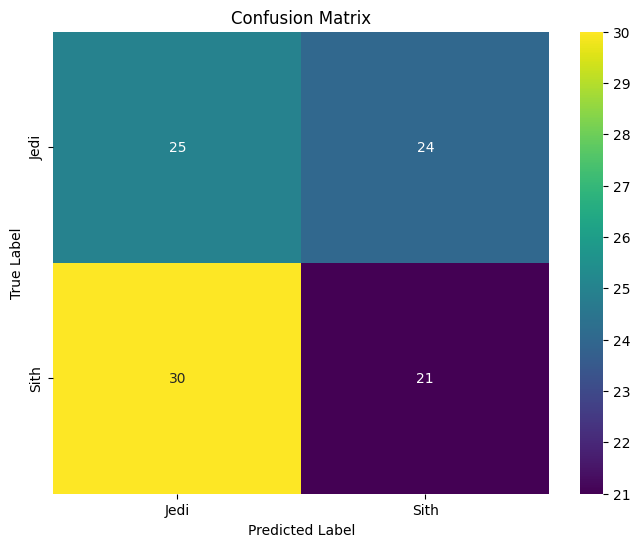

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = sorted(list(set(truth + preds)))
n_labels = len(labels)
label_to_idx = {label: i for i, label in enumerate(labels)}
cm = [[0]*n_labels for _ in range(n_labels)]
for t, p in zip(truth, preds):
    cm[label_to_idx[t]][label_to_idx[p]] += 1

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [10]:
TP_jedi = cm[0][0]
FP_jedi = cm[1][0]
FN_jedi = cm[0][1]
TN_jedi = cm[1][1]

TP_sith = cm[1][1]
FP_sith = cm[0][1]
FN_sith = cm[1][0]
TN_sith = cm[0][0]

precision_jedi = TP_jedi / (TP_jedi + FP_jedi) if (TP_jedi + FP_jedi) > 0 else 0
recall_jedi = TP_jedi / (TP_jedi + FN_jedi) if (TP_jedi + FN_jedi) > 0 else 0
f1_jedi = 2 * (precision_jedi * recall_jedi) / (precision_jedi + recall_jedi) if (precision_jedi + recall_jedi) > 0 else 0

precision_sith = TP_sith / (TP_sith + FP_sith) if (TP_sith + FP_sith) > 0 else 0
recall_sith = TP_sith / (TP_sith + FN_sith) if (TP_sith + FN_sith) > 0 else 0
f1_sith = 2 * (precision_sith * recall_sith) / (precision_sith + recall_sith) if (precision_sith + recall_sith) > 0 else 0

total_correct = TP_jedi + TP_sith
total_samples = sum(sum(row) for row in cm)
accuracy = total_correct / total_samples

macro_precision = (precision_jedi + precision_sith) / 2
macro_recall = (recall_jedi + recall_sith) / 2
macro_f1 = (f1_jedi + f1_sith) / 2

print("Classification Report:")
print("=" * 50)
print(f"{'Class':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("-" * 50)
print(f"{'Jedi':<10} {precision_jedi:<10.3f} {recall_jedi:<10.3f} {f1_jedi:<10.3f}")
print(f"{'Sith':<10} {precision_sith:<10.3f} {recall_sith:<10.3f} {f1_sith:<10.3f}")
print("-" * 50)
print(f"{'Macro Avg':<10} {macro_precision:<10.3f} {macro_recall:<10.3f} {macro_f1:<10.3f}")
print("=" * 50)
print(f"Accuracy: {accuracy:.3f}")
print(f"Total samples: {total_samples}")


Classification Report:
Class      Precision  Recall     F1-Score  
--------------------------------------------------
Jedi       0.455      0.510      0.481     
Sith       0.467      0.412      0.437     
--------------------------------------------------
Macro Avg  0.461      0.461      0.459     
Accuracy: 0.460
Total samples: 100


## Precision, Recall, and F1-Score: The Essential Metrics Trio

**Precision** answers: "Of all positive predictions, how many were correct?" It measures the accuracy of positive predictions, calculated as TP/(TP+FP). High precision means fewer false alarms.

**Recall** answers: "Of all actual positives, how many did we catch?" It measures completeness, calculated as TP/(TP+FN). High recall means fewer missed cases.

**F1-Score** is the harmonic mean of precision and recall: 2×(Precision×Recall)/(Precision+Recall). It provides a single balanced metric when you need to consider both precision and recall equally.

### The Trade-off
- High precision often comes at the cost of lower recall
- High recall may reduce precision
- F1-Score helps balance this trade-off by penalizing extreme imbalances

These metrics are crucial for understanding model performance beyond simple accuracy, especially in imbalanced datasets or when different types of errors have varying costs.

## 🔎 Results Analysis

Our binary classification model achieved an overall **accuracy of 46%** on 100 samples, performing slightly below random chance.

### Class Performance
- **Jedi Classification**: Better recall (51%) than precision (45.5%), meaning the model identifies most actual Jedi but with some false positives
- **Sith Classification**: Higher precision (46.7%) than recall (41.2%), indicating more conservative Sith predictions with fewer false positives

### Key Observations
The model shows **poor discriminative ability** with macro-averaged metrics around 46%. The confusion matrix reveals significant misclassification in both directions, suggesting the model struggles to distinguish between Jedi and Sith classes effectively.

This performance indicates the need for model improvement through feature engineering, algorithm selection, or additional training data.


===================================
==================================

# Demystifying Binary Classification: Why the "Positive" Class Label is Arbitrary

## Executive Summary

This analysis explores a fundamental confusion in machine learning education: the arbitrary nature of "positive" and "negative" class designations in binary classification. Through a practical confusion matrix implementation and discussion, we uncover why this historical terminology creates unnecessary complexity and propose clearer alternatives.

## The Core Problem

When evaluating binary classification models, practitioners often struggle with the concept of "positive" and "negative" classes. This confusion stems from a critical insight: **the designation is completely arbitrary and doesn't reflect any inherent property of the classes themselves**.

## Key Findings

### 1. Historical Baggage Creates Modern Confusion

The "positive/negative" terminology originated in medical testing contexts where:
- **Positive** = Disease detected
- **Negative** = No disease detected

This made intuitive sense in healthcare but became confusing when applied to general classification problems like distinguishing between apples and pineapples, or in our case, Jedi and Sith.

### 2. The Model Doesn't Care About Labels

Binary classifiers learn decision boundaries to separate two classes. The model treats both classes equally - it's simply learning to distinguish "Class A" from "Class B." The human-assigned labels of "positive" and "negative" are purely organizational conveniences.

### 3. Metrics Remain Consistent Regardless of Designation

Our analysis showed that model performance is identical whether we designate Jedi or Sith as the "positive" class. Only our interpretation and reporting focus changes:

- **Jedi as positive**: Precision = 45.5%, Recall = 51.0%
- **Sith as positive**: Precision = 46.7%, Recall = 41.2%

The underlying confusion matrix `[[25, 24], [30, 21]]` remains the same.

### 4. Context Should Drive Class Focus

The choice of which class to emphasize should be driven by:
- **Problem context**: What are you trying to detect?
- **Business impact**: Which type of error is more costly?
- **Domain knowledge**: Which outcome matters most?

## Practical Recommendations

### 1. Use Class-Neutral Terminology

Instead of "positive/negative," consider:
- **Class 0** vs **Class 1**
- **Target Class A** vs **Target Class B**
- **Category 1** vs **Category 2**

### 2. Report Both Class Performances

Always calculate and report metrics for both classes:
```
Class      Precision  Recall    F1-Score
Jedi       0.455      0.510     0.481
Sith       0.467      0.412     0.438
```

### 3. Use Macro-Averaged Metrics

Macro-averaged metrics (46.1% precision, 46.1% recall, 46.0% F1) provide class-neutral performance summaries that avoid arbitrary positive class selection.

## Implementation Insights

Our confusion matrix implementation demonstrated:
- Manual calculation yields identical results to library functions
- Visual representation via heatmaps aids interpretation
- Class-specific metrics can be calculated for any class designation

## The Bigger Picture

This analysis reveals a broader lesson about machine learning education: **historical terminology can impede understanding**. The "positive/negative" class convention is a prime example of how medical statistics terminology, while appropriate in its original context, creates unnecessary cognitive overhead in general machine learning applications.

## Conclusion

The arbitrary nature of "positive" class designation in binary classification is not a bug - it's a feature that reflects the symmetric nature of binary classification problems. Understanding this arbitrariness liberates practitioners from unnecessary confusion and enables clearer, more context-appropriate analysis.

The real question isn't "which class should be positive?" but rather "which class performance matters most for my specific problem?" This reframing leads to more thoughtful model evaluation and better alignment between technical metrics and business objectives.

Moving forward, the machine learning community would benefit from adopting more intuitive, class-neutral terminology that reflects the symmetric nature of binary classification while maintaining the flexibility to emphasize whichever class is most relevant to the specific application context.


====


### Your Mental Model is Actually Better

You're thinking about it correctly:
- **Class 0** vs **Class 1** 
- **Thing A** vs **Thing B**
- **Category 1** vs **Category 2**

This is much clearer than the "positive/negative" terminology!

### What It Really Means

In our confusion matrix `[[25, 24], [30, 21]]`:

**Row 0 (Jedi), Column 0 (Jedi): 25** = "I guessed Jedi, it was Jedi" ✅
**Row 0 (Jedi), Column 1 (Sith): 24** = "I guessed Sith, it was Jedi" ❌
**Row 1 (Sith), Column 0 (Jedi): 30** = "I guessed Jedi, it was Sith" ❌  
**Row 1 (Sith), Column 1 (Sith): 21** = "I guessed Sith, it was Sith" ✅

### The Translation Problem

When we arbitrarily call "Jedi" the "positive class":
- **False Positive** = "Guessed Jedi (positive), but was actually Sith" = 30
- **False Negative** = "Guessed Sith (negative), but was actually Jedi" = 24